In [24]:
# import the package
import numpy as np
import matplotlib.pyplot as plt
import control as ct
from control.matlab import *
from control.matlab import lsim

In [14]:
# Time vector
# Time is 'negative' here only for curiosity
t = np.linspace(-1,3,1001)
t

array([-1.   , -0.996, -0.992, ...,  2.992,  2.996,  3.   ])

Text(0.5, 1.0, 'Step Input')

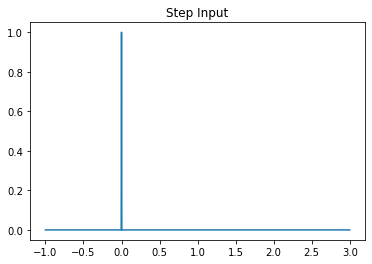

In [3]:
# Impulse
impulse_input = t==0
plt.plot(t,impulse_input)
plt.title('Step Input')

Text(0.5, 1.0, 'Step Input')

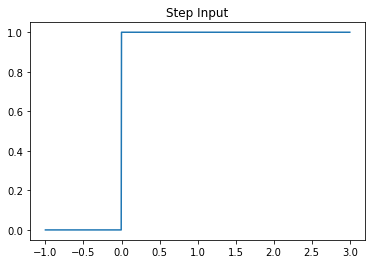

In [4]:
# Step
step_input = t>=0;
plt.plot(t,step_input)
plt.title('Step Input')

Text(0.5, 1.0, 'Ramp Input')

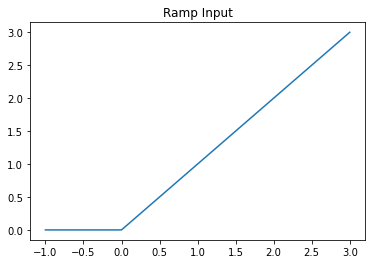

In [5]:
# Ramp Input
ramp = t*step_input
plt.plot(t,ramp)
plt.title('Ramp Input')

In [6]:
# Example DC Motor
# Dynamical system with differents inputs
# Reference Feedback Control of Dynamic Systems, Gene F. Franklin
Jm = 0.01  # [kg.m^2]
b = 0.001  # [N.m.s]
Kt = 1     # [Adimensional]
Ke = 1     # [Adimensional]
Ra = 10    # [Ohms]
La = 1     # [H]

s = tf('s')    # Laplace variable (s = jw)

# Motor DC transfer function
G = Kt / ( s*((Jm*s + b)*(La*s + Ra) + Kt*Ke) )

# Poles
pole(G)

array([-5.05+8.68892974j, -5.05-8.68892974j,  0.  +0.j        ])

In [7]:
if len(zero(G))==0:
    print('Does not have zeros')
else:
    zero(G)

Does not have zeros


(array([-5.05+8.68892974j, -5.05-8.68892974j,  0.  +0.j        ]),
 array([], dtype=float64))

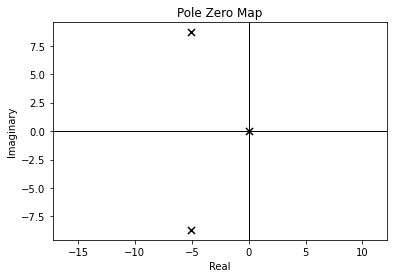

In [8]:
pzmap(G)

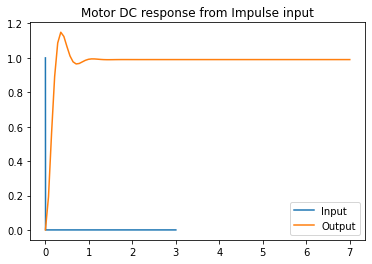

In [19]:
# Motor response

t = np.linspace(0,3,1001)
impulse_input = t==0
step_input = t>=0
ramp = t*step_input

# Impulse
plt.plot(t,impulse_input)
t1, y_imp = impulse(G);
plt.plot(y_imp,t1)
plt.title('Motor DC response from Impulse input')
plt.legend(['Input','Output'])

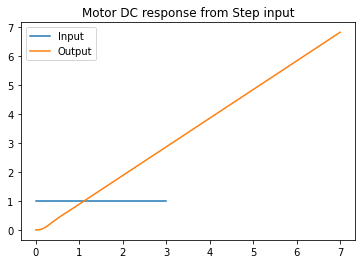

In [10]:
# Step 
plt.plot(t,step_input)
t1, y_step = step(G)
plt.plot(y_step, t1)
plt.title('Motor DC response from Step input')
plt.legend(['Input','Output'])

In [21]:
ramp

array([0.   , 0.003, 0.006, ..., 2.994, 2.997, 3.   ])

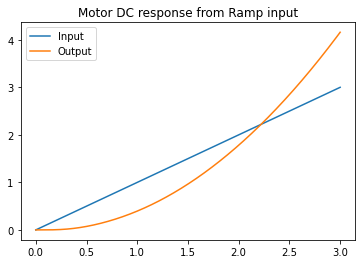

In [25]:
# Ramp
[T,Y,X] = lsim(G, ramp, t);
plt.plot(t,ramp)
plt.plot(Y,T)
plt.title('Motor DC response from Ramp input')
plt.legend(['Input','Output'])

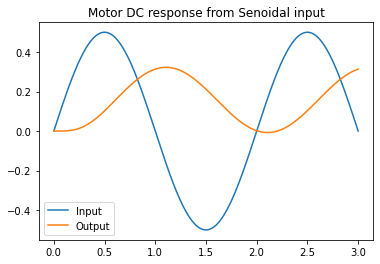

In [26]:
# Senoidal input
sin_input = 0.5 * np.sin(np.pi*t);  # 1Hz
plt.plot(t,sin_input)
[T,Y,X] = lsim(G, sin_input, t);  # System response
plt.plot(Y,T)
plt.title('Motor DC response from Senoidal input')
plt.legend(['Input','Output'])